# Open the data .root

In [1]:
from funciones import abrir , dibujar , reducir
import numpy as np
ve=abrir("data/electrones.root",(279,279,1000))
vm=abrir("data/muones.root",(279,279,1000))
# images of size 279x279

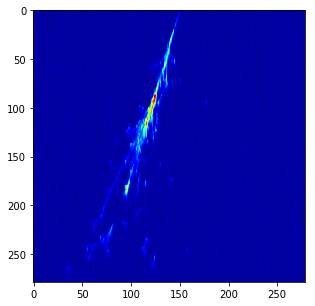

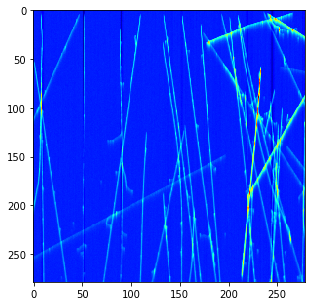

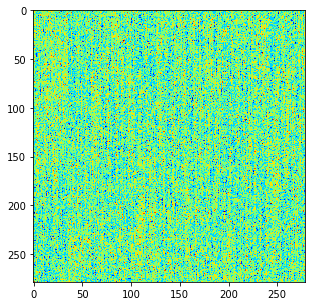

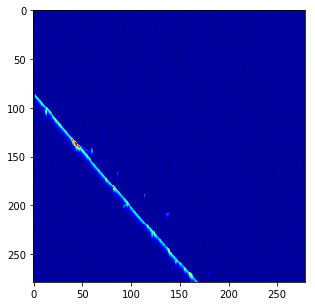

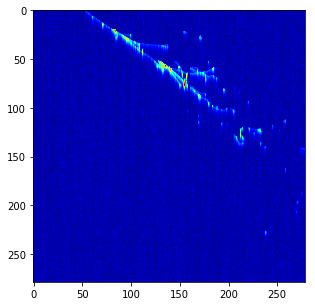

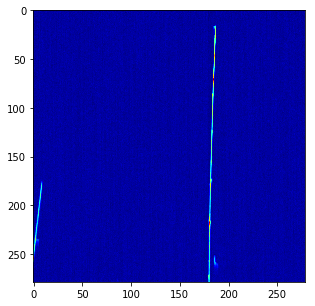

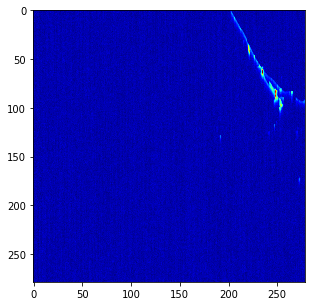

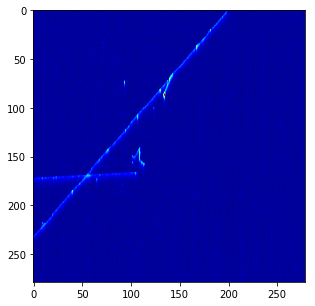

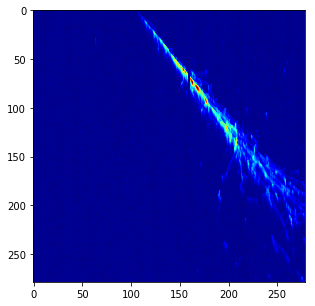

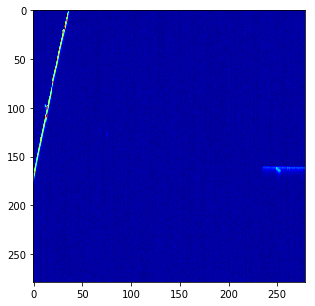

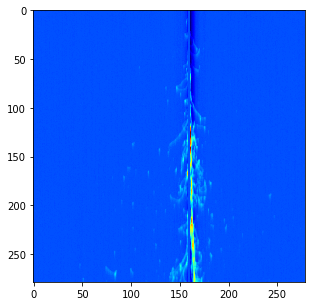

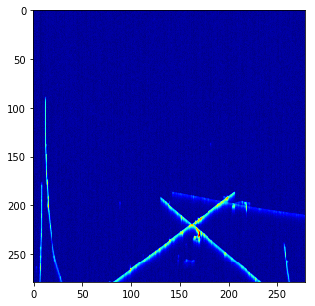

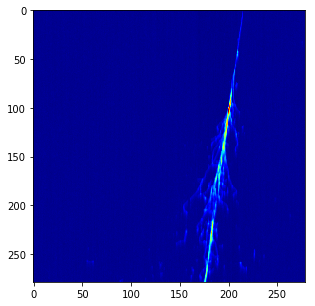

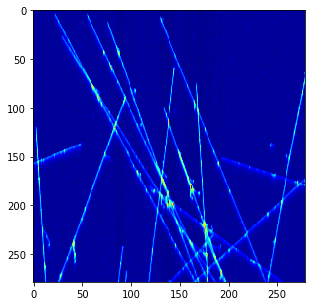

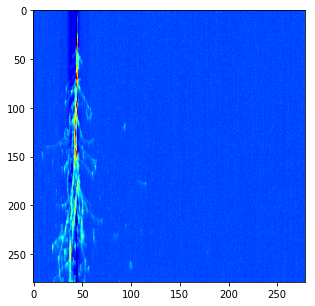

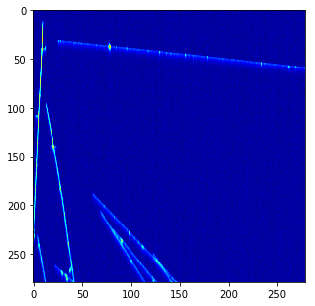

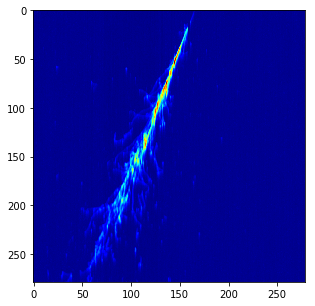

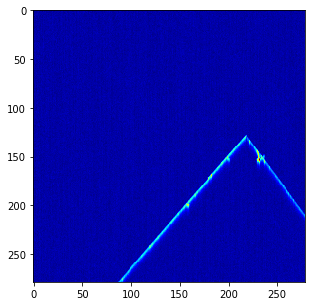

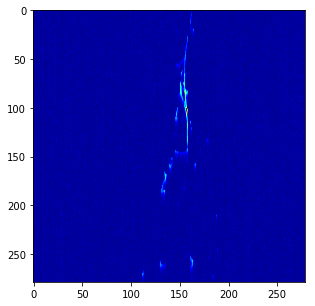

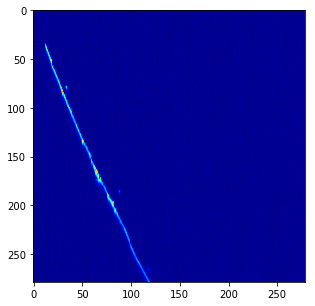

In [2]:
display=np.random.randint(0,1000,size=(1,10))[0] 
for i in display:
    dibujar(i,ve)
    dibujar(i,vm)

Train set will be 900 $e^{-}$ and 900 $\mu^{-}$ , the rest would be the validation/test set. As you can see in the images there is a small difference between muons and electrons. Muons are typically more. Furthermore, the following encoding is considered:
* $e^{-}= 1$
* $\mu^{-}= 0$

therefore,

In [3]:
ye=np.ones(1000)
ym=np.zeros(1000)
X=np.zeros((2000,1,279,279)) # inilizalize the data set X
y=np.zeros(2000) # initialize the data set Y
X[:1000,0,:,:]=np.swapaxes(ve,0,2)
X[1000:,0,:,:]=np.swapaxes(vm,0,2)
y[:1000]=ye
y[1000:]=ym

# Trick to shuffle the arrays `X` and `y` to the same order

In [4]:
#random shuffle program
s=np.arange(X.shape[0])
np.random.shuffle(s)
X=X[s,:,:,:]
y=y[s]

In [5]:
# separate our data set into train and test sets
X_train , y_train = X[:1800,:,:,:] , y[:1800]
X_test , y_test = X[1800:,:,:,:] , y[1800:]

# Convolutional layers 
We are going to use **keras**


1 . according to Keras
* 4D tensor with shape: (batch, channels, rows, cols) if data_format is "channels_first" or 4D tensor with shape: (batch, rows, cols, channels) if data_format is "channels_last".

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense

Using TensorFlow backend.


In [9]:
model = keras.models.Sequential()

In [10]:
model.add( Conv2D(4,4,activation='relu',data_format="channels_first",input_shape=(X.shape[1],X.shape[2],X.shape[3])))

In [11]:
print(model.layers[-1].output_shape)

(None, 4, 276, 276)


In [12]:
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)

(None, 4, 138, 138)


In [13]:
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))

In [14]:
#convolutional block
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)

(None, 6, 30, 30)


In [15]:
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)

(None, 6, 12, 12)


In [16]:
print(model.layers[-1].output_shape)

(None, 6, 12, 12)


In [17]:
model.add(Flatten())
print(model.layers[-1].output_shape)

(None, 864)


In [18]:
model.add(Dense(1,activation='sigmoid'))
print(model.layers[-1].output_shape)

(None, 1)


In [19]:
#compile the model using adam optimizer and binary crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
history = model.fit(X_train,y_train,epochs=50,batch_size=5,validation_data=(X_test,y_test),verbose=1)

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 5s 3ms/step - loss: 0.5630 - val_loss: 0.4110
Epoch 2/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.3301 - val_loss: 0.2564
Epoch 3/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.2021 - val_loss: 0.2177
Epoch 4/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1316 - val_loss: 0.1820
Epoch 5/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1196 - val_loss: 0.1825
Epoch 6/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.0939 - val_loss: 0.1752
Epoch 7/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1060 - val_loss: 0.1924
Epoch 8/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.0750 - val_loss: 0.1888
Epoch 9/50
1800/1800 [==============================] - 3s 2ms/step - loss: 0.0565 - val_loss: 0.2603
Epoch 10/50
1800/1800 [============

# resultado

In [21]:
def resultado(pred): # percent of the data correctly predected
    predbi=pred > 0.5
    print(predbi.shape)
    return np.sum((predbi[:,0]==y_test))/y_test.shape[0]

In [22]:
pred=model.predict(X_test)
resultado(pred)

(200, 1)


0.93

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 276, 276)       68        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 138, 138)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 138, 138)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 133, 133)       870       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 66, 66)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 66, 66)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 61, 61)         1302      
__________

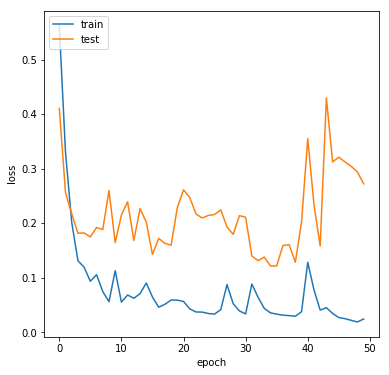

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

# Confusion matrix

By definition a confusion matrix $C$ is such that $C_{ij}$ is equal to the number of observations known to be in group  $i$ but predicted to be in group $j$ .

In [63]:
from sklearn.metrics import confusion_matrix

In [92]:
y_true = y_test > 0.5
y_pred = (model.predict(X_test) > 0.5)[:,0]

C=confusion_matrix(y_true,y_pred, labels=[True,False])
print(C)
##The normalized matrix is computed as
C_normalized=C.astype('float') / C.sum(axis=1)[:, np.newaxis]
print(C_normalized)

[[ 85   5]
 [  9 101]]
[[0.94444444 0.05555556]
 [0.08181818 0.91818182]]


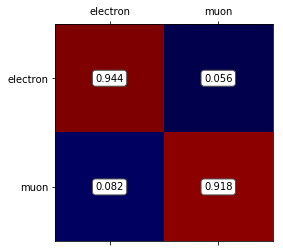

In [107]:
#Plot the normalized confusion matrix

classes= ['electron','muon']
data=C_normalized
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
x_pos = np.arange(len(classes))
plt.xticks(x_pos,classes)
y_pos = np.arange(len(classes))
plt.yticks(y_pos,classes)
plt.show()

# Things to consider 
1. number of filters: 4,8,16,32
2. Batch size : 16, 32, ...
3. Normalized confusion matrix
4. dropout = 0.01, ...
5. Train more epochs to show overfiting
6. put names to layers

# Train more epochs to show overfiting and modify mini batch

In [133]:
del model 

In [134]:
# this could be inside a funtion
model = keras.models.Sequential()
model.add( Conv2D(4,4,activation='relu',data_format="channels_first",input_shape=(X.shape[1],X.shape[2],X.shape[3])))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
#convolutional block
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)
model.add( Conv2D(6,6,activation='relu',data_format="channels_first"))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0))
print(model.layers[-1].output_shape)
model.add(Flatten())
print(model.layers[-1].output_shape)
model.add(Dense(1,activation='sigmoid'))
print(model.layers[-1].output_shape)

(None, 4, 138, 138)
(None, 6, 30, 30)
(None, 6, 12, 12)
(None, 864)
(None, 1)


In [135]:
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(X_train,y_train,epochs=100,batch_size=5,validation_data=(X_test,y_test),verbose=0)

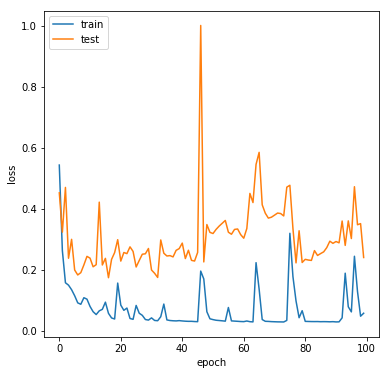

In [136]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

[[ 89   1]
 [  8 102]]
[[0.98888889 0.01111111]
 [0.07272727 0.92727273]]


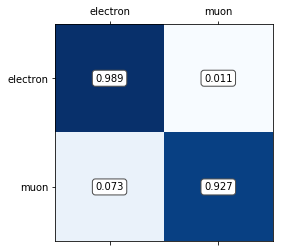

In [175]:
y_true = y_test > 0.5
y_pred = (model.predict(X_test) > 0.5)[:,0]

C=confusion_matrix(y_true,y_pred, labels=[True,False])
print(C)
##The normalized matrix is computed as
C_normalized=C.astype('float') / C.sum(axis=1)[:, np.newaxis]
print(C_normalized)
classes= ['electron','muon']
data=C_normalized
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
x_pos = np.arange(len(classes))
plt.xticks(x_pos,classes)
y_pos = np.arange(len(classes))
plt.yticks(y_pos,classes)
title='confusion matrix'
plt.show()

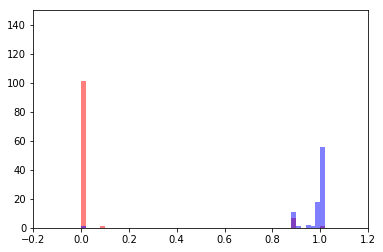

In [174]:
pred = model.predict(X_test)[:,0]
e=[]
mu=[]
i=0

for val in y_test:
    if val==1:
        e.append(pred[i])
    else:
        mu.append(pred[i])
    i=i+1
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mu, bins=np.arange(0, 1.2, 0.02), ls='dotted', alpha = 0.5, lw=3, color= 'r')
ax.hist(e, bins=np.arange(0, 1.2, 0.02), ls='dotted', alpha = 0.5, lw=3, color= 'b')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 150)
plt.show()